In [ ]:
from mlrl.maze.maze_env import make_maze_env
from mlrl.maze.maze_state import MazeState, RestrictedActionsMazeState
from mlrl.meta.search_tree import SearchTree
from mlrl.meta.meta_env import MetaEnv
from mlrl.maze.maze_tree_policy_renderer import render_tree_policy
from mlrl.maze.manhattan_q import ManhattanQHat

from tf_agents.environments.tf_py_environment import TFPyEnvironment
from tf_agents.environments.gym_wrapper import GymWrapper
from tf_agents.environments.batched_py_environment import BatchedPyEnvironment

: 

In [9]:
def create_meta_env(seed=0):
    object_env = make_maze_env(
        seed=seed, maze_size=(5, 5), goal_reward=1,
        generate_new_maze_on_reset=True
    )

    q_hat = ManhattanQHat(object_env)
    extract_state = RestrictedActionsMazeState.extract_state(object_env)
    initial_tree = SearchTree(object_env, extract_state, q_hat)
    meta_env = MetaEnv(object_env, initial_tree, max_tree_size=10,
                       tree_policy_renderer=render_tree_policy,
                       split_mask_and_tokens=True,
                       one_hot_action_space=False,
                       expand_all_actions=True,
                       object_action_to_string=lambda a: object_env.ACTION[a])
    return meta_env


batch_size = 2
env = TFPyEnvironment(BatchedPyEnvironment([
    GymWrapper(create_meta_env()) for _ in range(batch_size)
], multithreading=False))

In [12]:
from mlrl.utils.render_utils import create_policy_eval_video, embed_mp4
from mlrl.meta.meta_env import mask_token_splitter
from tf_agents.policies.random_tf_policy import RandomTFPolicy


random_policy = RandomTFPolicy(
    env.time_step_spec(),
    env.action_spec(),
    observation_and_action_constraint_splitter=mask_token_splitter
)
embed_mp4(create_policy_eval_video(random_policy, env, max_steps=120))

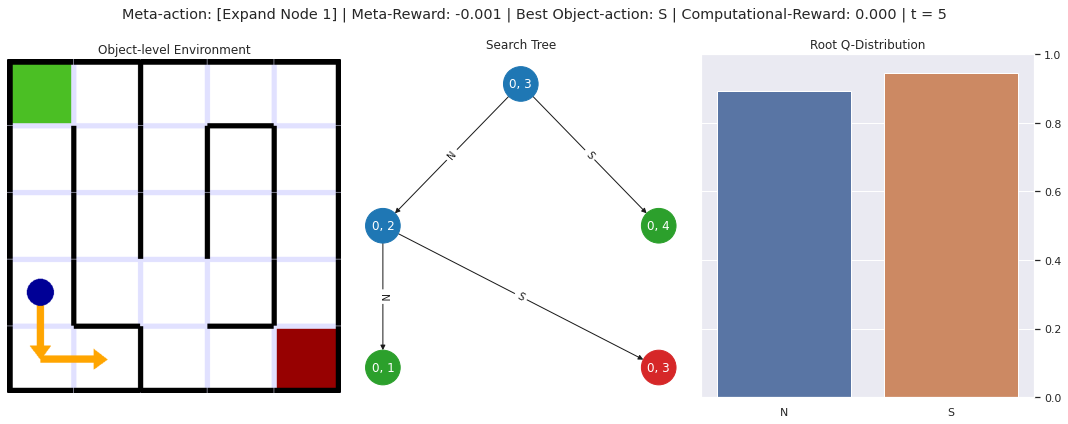

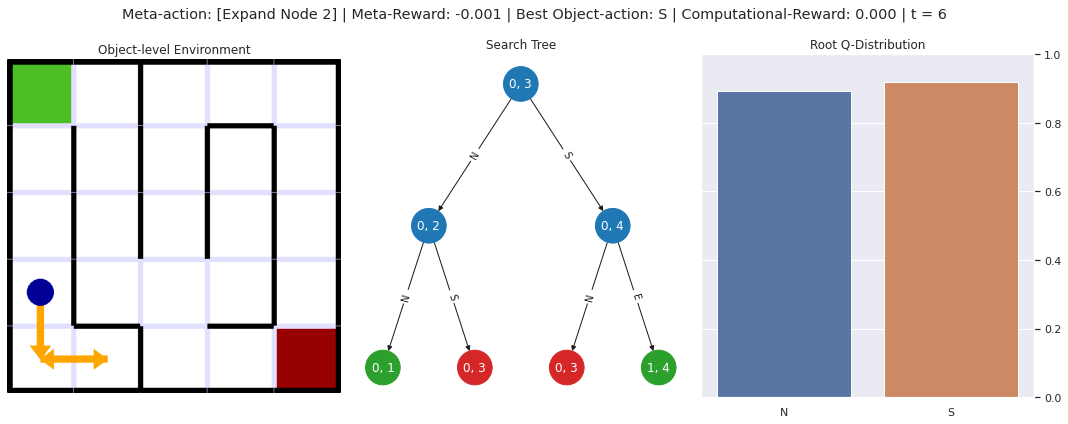

Estimating value of policy with updated tree:
 [MazeState(0, 3), False]
|---[0, -0.004]--> [MazeState(0, 2), False]
	|---[0, -0.004]--> [MazeState(0, 1), True]
	|---[1, -0.004]--> [MazeState(0, 3), False]
|---[1, -0.004]--> [MazeState(0, 4), False]
	|---[0, -0.004]--> [MazeState(0, 3), False]
	|---[2, -0.004]--> [MazeState(1, 4), False]
		|---[3, -0.004]--> [MazeState(0, 4), False]
P(N | MazeState(0, 3)) = 1.0
P(N | MazeState(0, 2)) = 1.0
P(S | MazeState(0, 1)) = 1.0
Leaf evaluation: Q-hat(MazeState(0, 1), S) = 0.91807
Value(MazeState(0, 1)) = 0.91807
Recursive Q-hat(MazeState(0, 2), N) = 0.90489
Value(MazeState(0, 2)) = 0.90489
Recursive Q-hat(MazeState(0, 3), N) = 0.89184
Value(MazeState(0, 3)) = 0.89184

Estimating value of policy with prior tree:
 [MazeState(0, 3), False]
|---[0, -0.004]--> [MazeState(0, 2), False]
	|---[0, -0.004]--> [MazeState(0, 1), True]
	|---[1, -0.004]--> [MazeState(0, 3), False]
|---[1, -0.004]--> [MazeState(0, 4), False]
	|---[0, -0.004]--> [MazeState(0, 3)

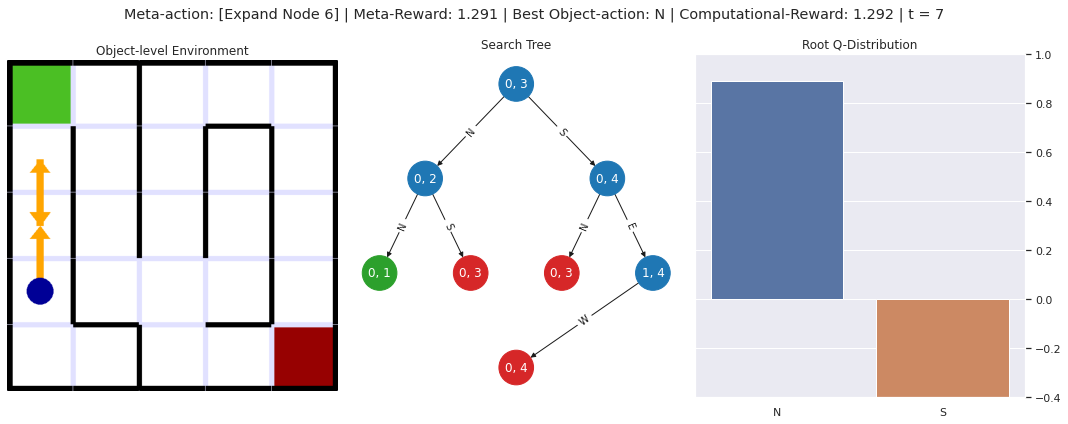

In [14]:
meta_env = create_meta_env()
meta_env.reset()
meta_env.reset()

for i in range(3):
    meta_env.step(0)
meta_env.step(1)
# meta_env.render(plt_show=True);
meta_env.step(2)
# meta_env.step(4)
# meta_env.step(5)
# meta_env.step(0)
meta_env.render(plt_show=True);
meta_env.step(3)
# meta_env.step(9, verbose=True)
meta_env.render(plt_show=True);
meta_env.step(7, verbose=True)
meta_env.render(plt_show=True);


In [ ]:
meta_env.search_tree_policy.estimate_optimal_q_values(meta_env.tree.root_node.state, verbose=True)

Estimating optimal Q-values for state MazeState(0, 3) from nodes: [[MazeState(0, 3), False]
|---[0, -0.004]--> [MazeState(0, 2), True]
|---[1, -0.004]--> [MazeState(0, 4), False]
	|---[0, -0.004]--> [MazeState(0, 3), False]
	|---[2, -0.004]--> [MazeState(1, 4), False]
		|---[3, -0.004]--> [MazeState(0, 4), False]]
Aggregating Q-value estimates from children: [[MazeState(0, 2), True]]

Estimating optimal Q-values for state MazeState(0, 2) from nodes: [[MazeState(0, 2), True]]
Computing Q-value from estimator on leaf node:Q(MazeState(0, 2), N) = 0.904891487069786
Computing Q-value from estimator on leaf node:Q(MazeState(0, 2), S) = 0.9313860698599999

Optimal Q-values:
 Q*(MazeState(0, 2), N) = 0.904891487069786,Q*(MazeState(0, 2), S) = 0.9313860698599999
Aggregating Q-value estimates from children: [[MazeState(0, 4), False]
|---[0, -0.004]--> [MazeState(0, 3), False]
|---[2, -0.004]--> [MazeState(1, 4), False]
	|---[3, -0.004]--> [MazeState(0, 4), False]]

Estimating optimal Q-values fo

defaultdict(<function mlrl.meta.tree_policy.SearchTreePolicy.estimate_optimal_q_values.<locals>.<lambda>()>,
            {0: 0.9180722091614, 1: -0.3999999999999994})

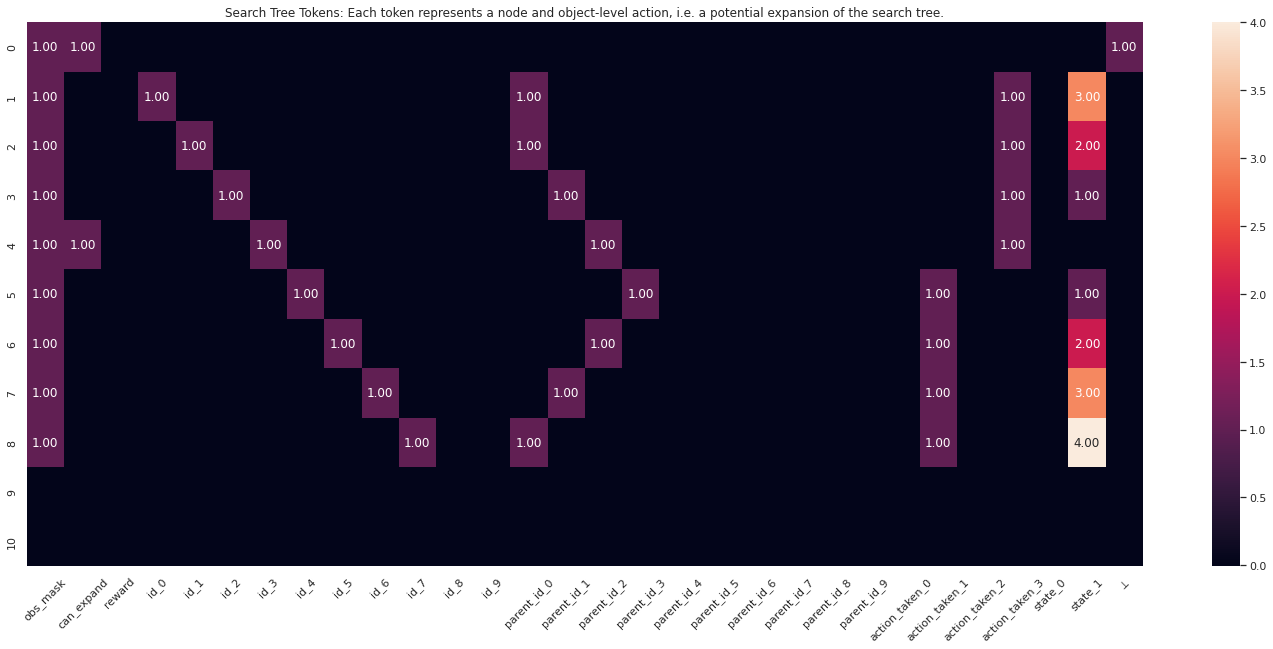

In [8]:
meta_env.plot_search_tokens(annot_fmt='.2f')

In [3]:
import numpy as np
env.reset()

for _ in range(8):
    actions = env.current_time_step().observation['valid_action_mask'].numpy()[0]
    actions[0] = 0
    action = np.random.choice(np.arange(len(actions)), p=actions/actions.sum())
    env.step(action)

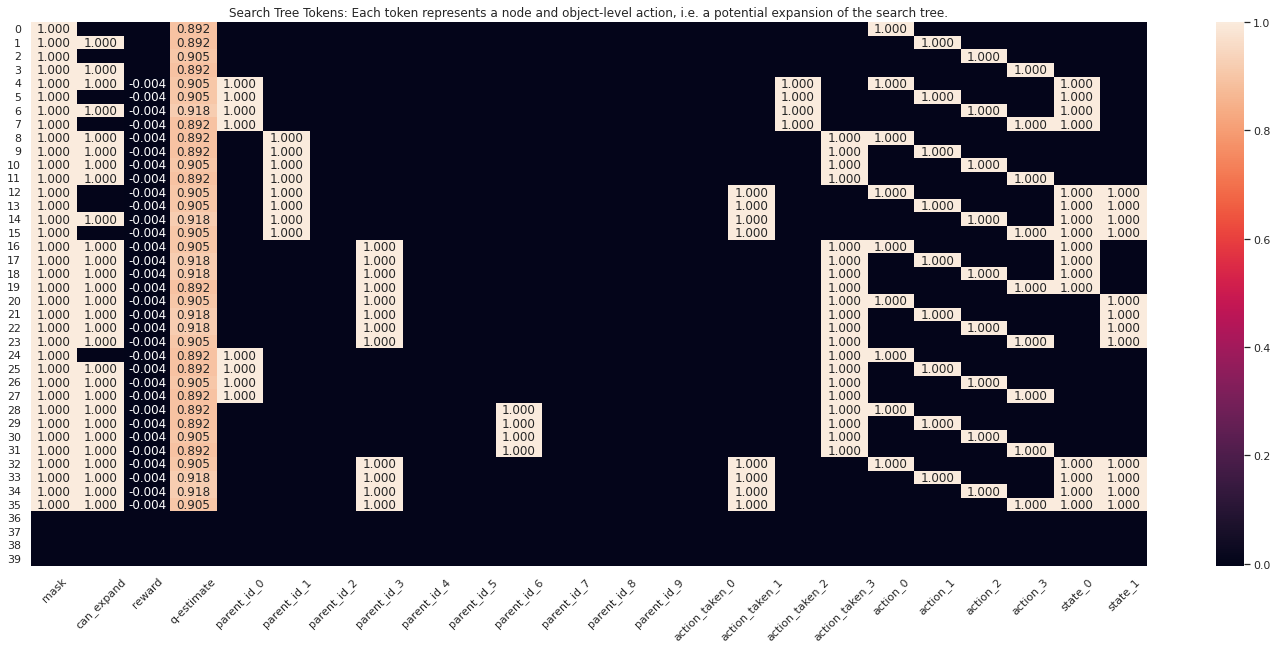

In [5]:
meta_env.plot_search_tokens()

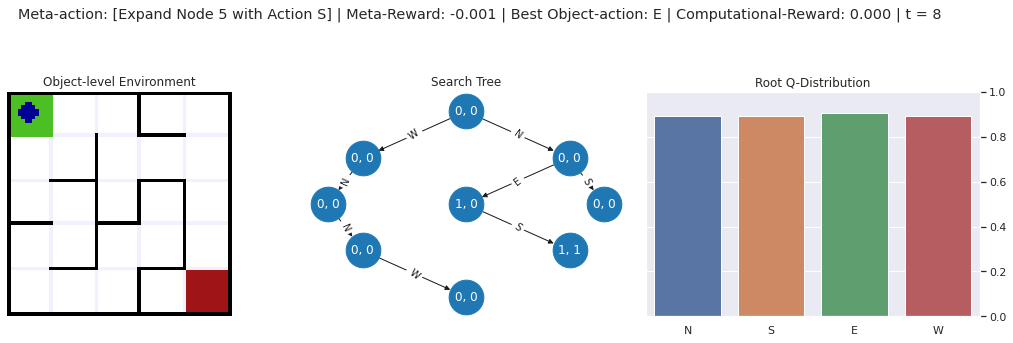

In [15]:
meta_env.render(plt_show=True);

In [6]:
def mask_invalid_action_constraint_splitter(observation):
    return observation['search_tree_tokens'], observation['valid_action_mask']


from mlrl.meta.search_q_model import SearchQModel

import tensorflow as tf
from tf_agents.networks import sequential
from tf_agents.agents.dqn import dqn_agent
from tf_agents.utils import common
from tf_agents.specs import tensor_spec


# weights_path = './runs/dqn_agent/simple_single_grid_dqn-16638260065752182/model'
weights_path = './q_net.h5'

q_net = SearchQModel()
q_net(env.current_time_step().observation['search_tree_tokens'])  # build the model
q_net.load_weights(weights_path)

optimizer = tf.keras.optimizers.Adam(learning_rate=0)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    env.time_step_spec(),
    env.action_spec(),
    q_network=sequential.Sequential([q_net]),
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    observation_and_action_constraint_splitter=mask_invalid_action_constraint_splitter,
    train_step_counter=train_step_counter
)

agent.initialize()

INFO:tensorflow:Assets written to: ram://283d7ece-269a-430b-b92c-2755512c6bb3/assets


INFO:tensorflow:Assets written to: ram://283d7ece-269a-430b-b92c-2755512c6bb3/assets


In [7]:
from mlrl.utils.render_utils import create_policy_eval_video, embed_mp4

embed_mp4(create_policy_eval_video(agent.policy, env, max_steps=30))

In [9]:
q_net.q_network.summary()

Model: "q_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10, 192)           3648      
                                                                 
 reshape_1 (Reshape)         (None, 40, 48)            0         
                                                                 
 prepend_terminate_token_1 (  (None, 41, 48)           0         
 PrependTerminateToken)                                          
                                                                 
 transformer_2 (Transformer)  (None, 41, 48)           11200     
                                                                 
 transformer_3 (Transformer)  (None, 41, 48)           11200     
                                                                 
 dense_3 (Dense)             (None, 41, 1)             49        
                                                         

## With Restricted Actions

In [14]:
from mlrl.maze.maze_env import make_maze_env
from mlrl.maze.maze_state import RestrictedActionsMazeState
from mlrl.meta.search_tree import SearchTree
from mlrl.meta.meta_env import MetaEnv
from mlrl.maze.manhattan_q import ManhattanQHat

from tf_agents.environments.tf_py_environment import TFPyEnvironment
from tf_agents.environments.gym_wrapper import GymWrapper


object_env = make_maze_env(
    seed=0, maze_size=(5, 5), goal_reward=1, render_shape=(64, 64),
    generate_new_maze_on_reset=False
)

q_hat = ManhattanQHat(object_env)
init_state = RestrictedActionsMazeState.extract_state(object_env)
initial_tree = SearchTree(object_env, init_state, q_hat)
meta_env = MetaEnv(object_env, initial_tree, max_tree_size=10, 
                   object_action_to_string=lambda a: object_env.ACTION[a])

env = TFPyEnvironment(GymWrapper(meta_env))


In [15]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy
from mlrl.meta.meta_env import mask_invalid_action_constraint_splitter

random_policy = RandomTFPolicy(
    env.time_step_spec(),
    env.action_spec(),
    observation_and_action_constraint_splitter=mask_invalid_action_constraint_splitter
)

In [3]:
from mlrl.utils.render_utils import create_policy_eval_video, embed_mp4

embed_mp4(create_policy_eval_video(random_policy, env, max_steps=300))

In [16]:
random_policy.action(env.current_time_step()).action

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>

In [17]:
env.reset()
for _ in range(10):
    a = random_policy.action(env.current_time_step()).action[0]
    if a == 0:
        continue
    env.step(a)

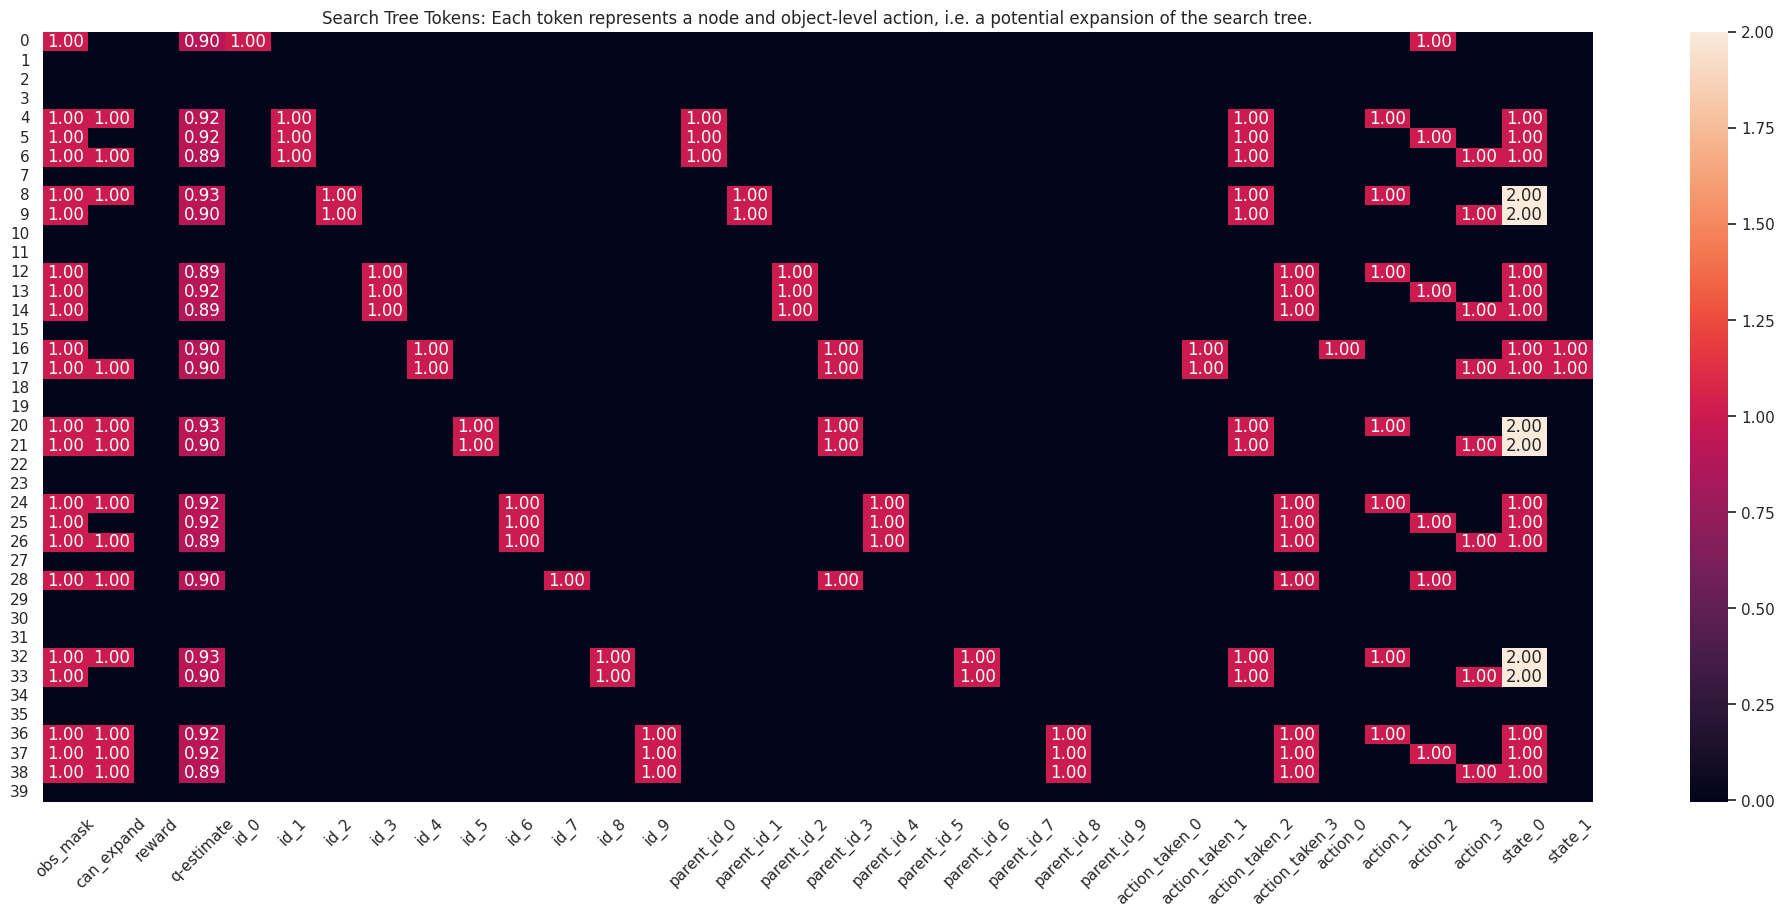

In [22]:
meta_env.plot_search_tokens(annot_fmt='.2f')

## Reward Distributions

In [ ]:
from mlrl.maze.maze_env import make_maze_env
from mlrl.maze.maze_state import RestrictedActionsMazeState
from mlrl.meta.search_tree import SearchTree
from mlrl.meta.meta_env import MetaEnv
from mlrl.maze.manhattan_q import ManhattanQHat

from tf_agents.environments.tf_py_environment import TFPyEnvironment
from tf_agents.environments.gym_wrapper import GymWrapper


object_env = make_maze_env(
    seed=0, maze_size=(5, 5), goal_reward=1, render_shape=(64, 64),
    generate_new_maze_on_reset=False
)

q_hat = ManhattanQHat(object_env)
init_state = RestrictedActionsMazeState.extract_state(object_env)
initial_tree = SearchTree(object_env, init_state, q_hat)
meta_env = MetaEnv(object_env, initial_tree, max_tree_size=10, 
                   object_action_to_string=lambda a: object_env.ACTION[a])

env = TFPyEnvironment(GymWrapper(meta_env))

In [10]:
from tf_agents.policies import TFPolicy
from tf_agents.environments.tf_environment import TFEnvironment
import numpy as np


def compute_return_stats(environment: TFEnvironment,
                         policy: TFPolicy,
                         num_episodes: int = 3,
                         max_steps: int = 100) -> float:
    """
    Computes mean and standard deviation for returns of a policy on a given environment.
    """

    returns = []
    rewards = []
    for _ in range(num_episodes):

        time_step = environment.reset()
        episode_return = 0.0
        n_steps = 0
        while not time_step.is_last() and n_steps < max_steps:
            action_step = policy.action(time_step)
            time_step = environment.step(action_step.action)
            episode_return += time_step.reward
            rewards.append(time_step.reward.numpy()[0])
            n_steps += 1

        returns.append(episode_return)

    returns = np.array(returns)

    return returns.mean(), returns.std(), rewards

In [11]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy
from mlrl.meta.meta_env import mask_invalid_action_constraint_splitter

random_policy = RandomTFPolicy(
    env.time_step_spec(),
    env.action_spec(),
    observation_and_action_constraint_splitter=mask_invalid_action_constraint_splitter
)

In [43]:
mean_return, return_std, rewards = compute_return_stats(env, random_policy, num_episodes=20)

In [45]:
rewards = [r.numpy()[0] for r in rewards]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


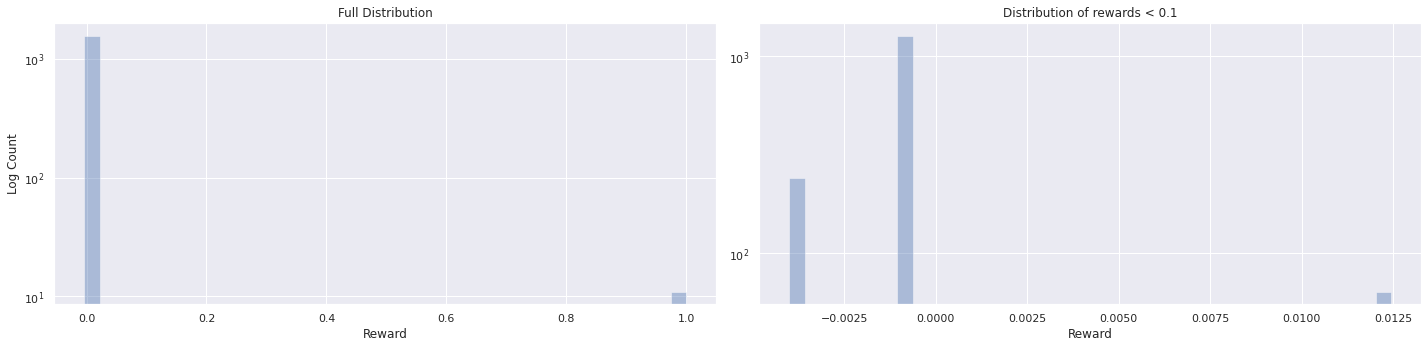

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

t = 0.1

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(rewards, ax=axs[0], kde=False)
sns.distplot([r for r in rewards if r < t], ax=axs[1], kde=False)

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlabel('Reward')

axs[0].set_ylabel('Log Count')
axs[1].set_ylabel('')
axs[0].set_title('Full Distribution')
axs[1].set_title(f'Distribution of rewards < {t}')
plt.tight_layout()
plt.show()